In [1]:
import pandas as pd
from pandas.api.types import is_string_dtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

In [3]:
df.head(30)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
Summary of numerical fields 

SyntaxError: invalid syntax (<ipython-input-4-ea7c666be972>, line 1)

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
Here are a few inferences, you can draw by looking at the output of describe() function:

LoanAmount has (614 – 592) 22 missing values.
Loan_Amount_Term has (614 – 600) 14 missing values.
Credit_History has (614 – 564) 50 missing values.
We can also look that about 84% applicants have a credit_history

SyntaxError: invalid syntax (<ipython-input-6-d856c6b168c4>, line 1)

In [ ]:
we can get an idea of a possible skew in the data by comparing the mean to the median

In [7]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

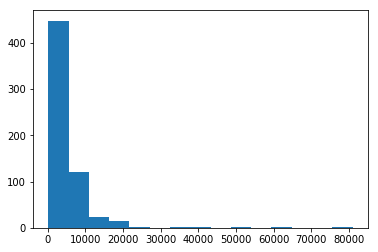

In [8]:
plt.hist(df.ApplicantIncome, bins=15)
plt.show()

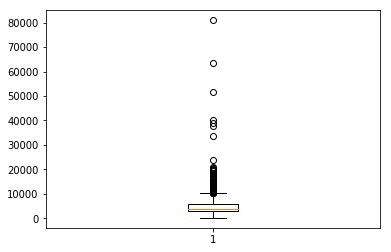

In [9]:
plt.boxplot(df.ApplicantIncome)
plt.show()

In [ ]:
This boxplot tells us there is a large disparity in income. 

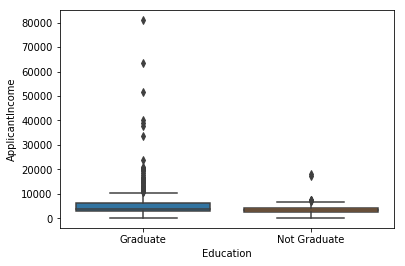

In [10]:
#df.boxplot(column="ApplicantIncome", by="Education")
sns.boxplot(data=df, y="ApplicantIncome", x="Education")
plt.show()

In [ ]:
The mean looks the same. However, there is more disparity between graduates with more outliers. 

/Users/yumelhernandez/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/yumelhernandez/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


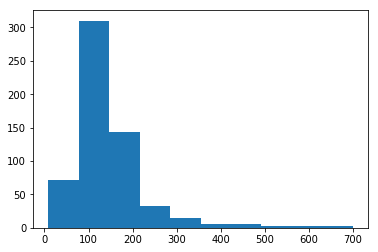

In [11]:
plt.hist(df.LoanAmount)
plt.show()

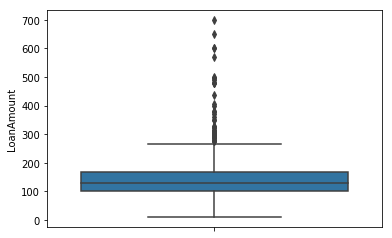

In [12]:
#df.boxplot(column="LoanAmount")
sns.boxplot(data=df, y="LoanAmount")
plt.show()

In [13]:
credit_history_vc = df["Credit_History"].value_counts(ascending=True)
p_of_loan = df.pivot_table(values="Loan_Status", index="Credit_History", aggfunc=lambda x: x.map({"Y": 1, "N": 0}).mean())

print("Credit Histoy")
print(credit_history_vc)

print("Probability of getting a Loan according to your history")
print(p_of_loan)

Credit Histoy
0.0     89
1.0    475
Name: Credit_History, dtype: int64
Probability of getting a Loan according to your history
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


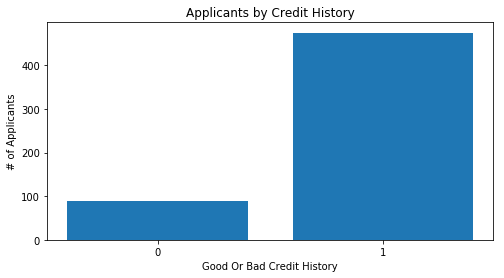

In [14]:
fig = plt.figure(figsize=(8,4))
ax = plt.subplot()
plt.bar(credit_history_vc.index.tolist(), credit_history_vc)
ax.set_xticks(credit_history_vc.index.tolist())
ax.set_xlabel("Good Or Bad Credit History")
ax.set_ylabel("# of Applicants")
ax.set_title("Applicants by Credit History")
plt.show()

<Figure size 576x720 with 0 Axes>

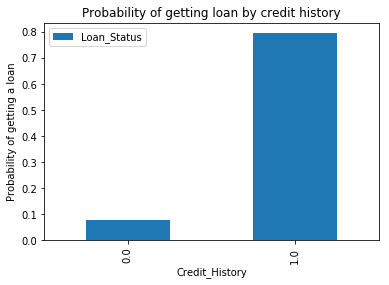

In [15]:
ax2 = plt.figure(figsize=(8,10))
ax2 = p_of_loan.plot(kind="bar")
ax2.set_ylabel("Probability of getting a loan")
ax2.set_title("Probability of getting loan by credit history")
plt.show()

/Users/yumelhernandez/miniconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


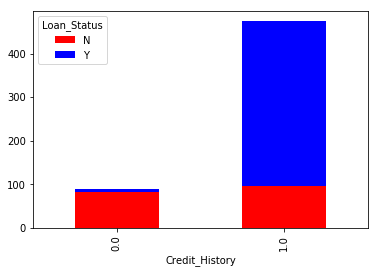

In [16]:
temp1 = pd.crosstab(df.Credit_History, df.Loan_Status)
temp1.plot(kind="bar", stacked=True, colors=["red", "blue"])
# come back for the gender part
# hint - temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

In [17]:
df.apply(lambda x: sum(x.isnull()), axis=0)


#bool_cols = [col for col in df if 
              # df[col].dropna().value_counts().index.isin(["Y", "N"]).all()]
#bool_cols2 = [col for col in df if 
               #df[col].dropna().value_counts().index.isin([0,1]).all()]
#bool_cols
#bool_cols2

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
column_type = []
for column in df.columns: 
   column_type.append(column) 
   column_type.append([column, is_string_dtype(df[column])])


for one in column_type:
   if one[1] == True:
     df[one[0]].fillna(df[one[0]].mode()[0], inplace=True)
   elif one[1] == False: 
       df[one[0]].fillna(df[one[0]].mean(), inplace=True)  

     

In [19]:

df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

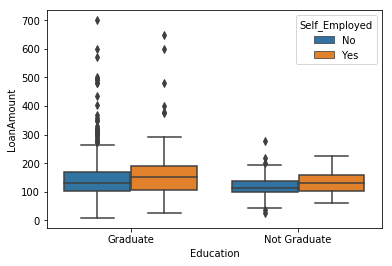

In [20]:
sns.boxplot(data=df, x="Education", hue="Self_Employed", y="LoanAmount")
plt.show

In [21]:
df.Self_Employed.value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [22]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
How about we analyze LoanAmount. Since it is realist to have extreme values thus we shouldnt disregard outliers.
Some people might apply for a huge loan to start a business while others might apply for a small loan for furnite for example.
Therefore, let’s try a log  transformation to nullify their effect.It will distribute it close to a normal 
distribuation and exreme values are less severe.


(array([  1.,   0.,   1.,   0.,   3.,   2.,   4.,  12.,  17.,  32.,  63.,
        137., 151.,  99.,  32.,  29.,  13.,   6.,   7.,   5.]),
 array([2.19722458, 2.41491737, 2.63261015, 2.85030294, 3.06799573,
        3.28568852, 3.5033813 , 3.72107409, 3.93876688, 4.15645967,
        4.37415246, 4.59184524, 4.80953803, 5.02723082, 5.24492361,
        5.4626164 , 5.68030918, 5.89800197, 6.11569476, 6.33338755,
        6.55108034]),
 <a list of 1 Patch objects>)

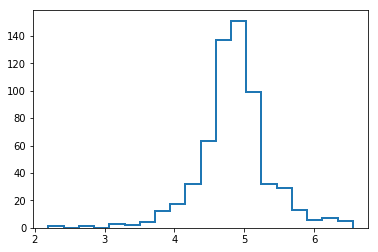

In [23]:
df["LoanAmount_Log"] = np.log(df["LoanAmount"])
plt.hist(df["LoanAmount_Log"], histtype="step", linewidth=2, bins=20)


In [24]:
We must also consider CoapplicantIncome and combine it with the Applicant's
income as total income. We should also make extreme values less severe with a log transformation as we just did before.

SyntaxError: invalid syntax (<ipython-input-24-ccf532002b7c>, line 1)

(array([  7.,  53., 186., 205.,  91.,  41.,  20.,   4.,   5.,   2.]),
 array([ 7.27378632,  7.67662813,  8.07946994,  8.48231175,  8.88515356,
         9.28799538,  9.69083719, 10.093679  , 10.49652081, 10.89936262,
        11.30220443]),
 <a list of 10 Patch objects>)

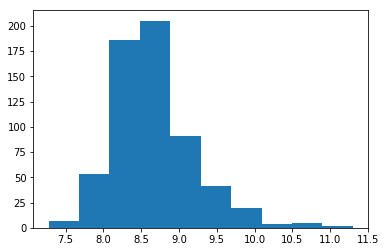

In [25]:
df["Total_income"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
df["Total_income_log"] = np.log(df["Total_income"])
plt.hist(np.log(df.Total_income))

In [ ]:
Lets figure out how well the applicant is suited for a loan

In [26]:
df["repayment_proability"] = df["LoanAmount"]/df["Total_income"]
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Log,Total_income,Total_income_log,repayment_proability
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,5849.0,8.674026,0.025032
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568,0.021015
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368,0.022000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323,0.024287
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515,0.023500


In [ ]:
Now that we have cleaned the data and have analyzed it, its Time to build a Machine Leanring prediction Model!

We are going to be using Python Sklearn Library to make a model as well as make the predictions. Because Sklean
takes only numeric inputs we need to convert binary values to numbers (0,1).

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
Binary_variables = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
Le = LabelEncoder()
for i in Binary_variables:
    df[i] = Le.fit_transform(df[i])

#lets check if it if all columns are numeric now
df.dtypes

Loan_ID                  object
Gender                    int64
Married                   int64
Dependents                int64
Education                 int64
Self_Employed             int64
ApplicantIncome           int64
CoapplicantIncome       float64
LoanAmount              float64
Loan_Amount_Term        float64
Credit_History          float64
Property_Area             int64
Loan_Status               int64
LoanAmount_Log          float64
Total_income            float64
Total_income_log        float64
repayment_proability    float64
dtype: object

In [29]:
#How about we go further and print in the first 5 rows of the dataframe
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Log,Total_income,Total_income_log,repayment_proability
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026,0.025032
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568,0.021015
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368,0.022000
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323,0.024287
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515,0.023500


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

features = df[["Credit_History", "Education", "Total_income", "Property_Area"]].astype(float)
label = df["Loan_Status"]

x_train, x_test, y_train, y_test = train_test_split(features,label, test_size=0.2)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = LogisticRegression()
model.fit(x_train, y_train)

print("The accuracy of the model is: "+ str(model.score(x_test, y_test)*100))
print("The model coefficient are: " + str(model.coef_))
print("The model intercept is:" + str(model.intercept_))

The accuracy of the model is: 76.42276422764228
The model coefficient are: [[ 1.24981976 -0.09070759 -0.08826969  0.06414211]]
The model intercept is:[0.91812005]


/Users/yumelhernandez/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
#cross validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(), features, label, cv=5)
print(scores)
print("The mean is: ", scores.mean())

[0.81451613 0.75       0.77868852 0.86065574 0.81967213]
The mean is:  0.8047065044949762


/Users/yumelhernandez/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yumelhernandez/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yumelhernandez/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yumelhernandez/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yumelhernandez/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: Futur

In [32]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_prediction = decision_tree.predict(x_test)

In [ ]:
#Since our output is binary we can use the Area under the curve(Auc) to predict the accuracy of the model instead of score.


In [33]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prediction)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
print("Accuracy is ", accuracy_score(y_test,y_prediction))


0.7000000000000001
Accuracy is  0.7073170731707317


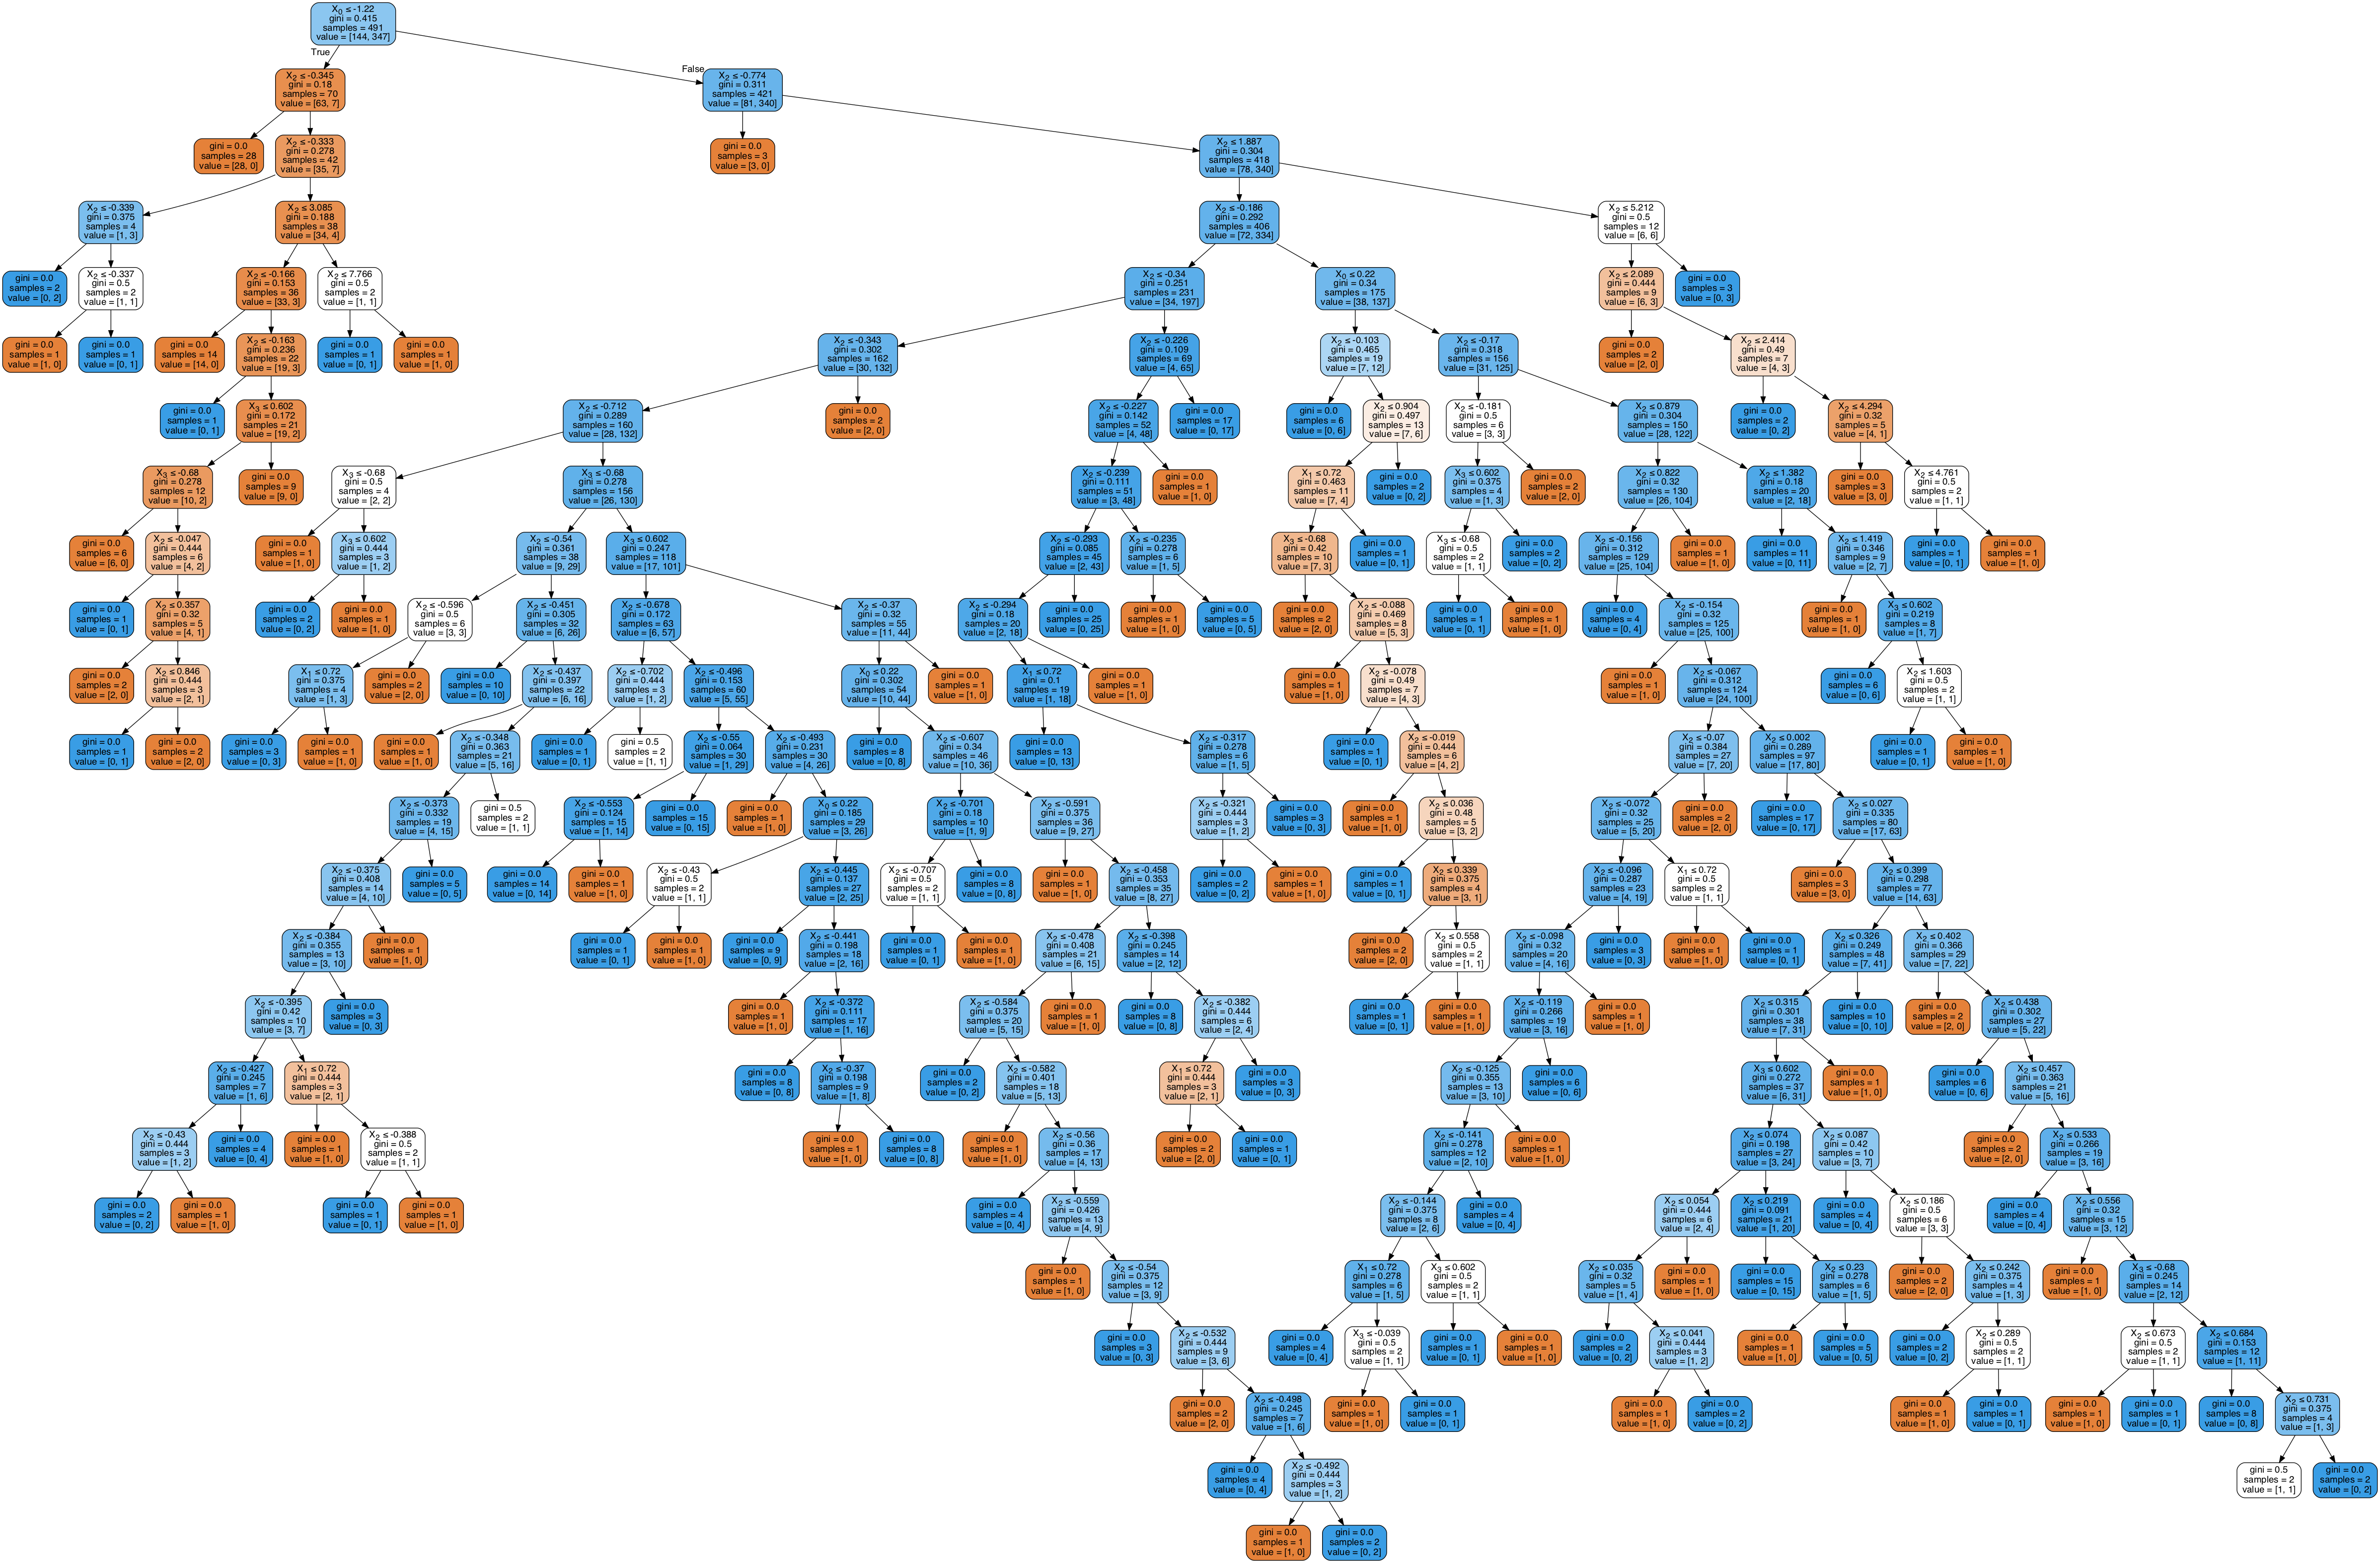

In [34]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus



dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())


In [ ]:
export_graviz covnerts the decision tree into a dot file while pydotplus converts this dot file into a png picture

In [ ]:
output = StringIO()
output.write('This goes into the buffer. ')
output.getvalue()